<a href="https://colab.research.google.com/github/SHASHANKV9611/Airbnb_EDA/blob/main/Final_Copy_of_shashank's_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
airbnb_df = pd.read_csv('/content/drive/MyDrive/Capstone project shashank/Airbnb NYC 2019.csv')

In [ ]:
airbnb_df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [ ]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
airbnb_df.isnull().sum() # to check the any null values or no values present in the columns of the data

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Note,
 here i am ignoring the latitude and longitude, as are they not playing major role in analysis because we considering Neighbhourhood groups


In [ ]:
airbnb_df.drop(['last_review','reviews_per_month','last_review','reviews_per_month'], axis = 1, inplace = True)

In [ ]:
airbnb_df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,4,188


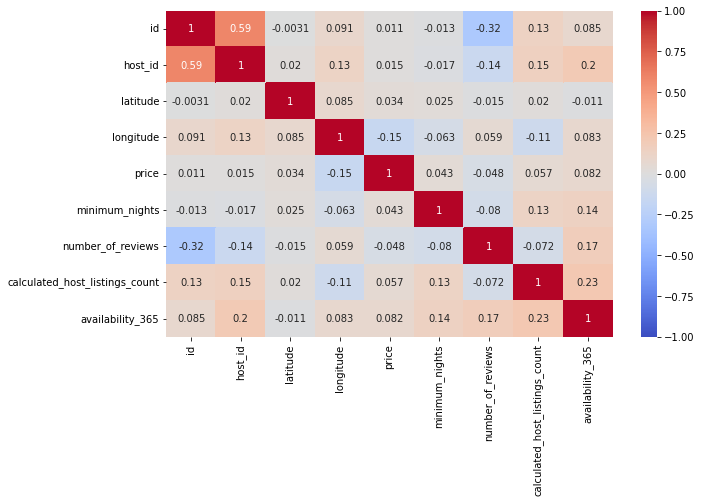

In [ ]:
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(airbnb_df.corr(), linewidths=0, vmin=-1, annot=True, cmap="coolwarm")
plt.show()

1.What can we learn about different hosts and areas?

In [ ]:
host_and_areas= airbnb_df.groupby(['host_name','neighbourhood_group'])["calculated_host_listings_count"].count().reset_index()
#hosts_and_areas
 #reset_index() is a method to reset index of a Data Frame. reset_index() method sets a list of integer ranging from 0 to length of data as index.

host_listing= hosts_and_areas.sort_values('calculated_host_listings_count',ascending= False).head(10)
host_listing


,host_name,neighbourhood_group,calculated_host_listings_count
13217,Sonder (NYC),Manhattan,327
1834,Blueground,Manhattan,230
9742,Michael,Manhattan,212
3250,David,Manhattan,202
9741,Michael,Brooklyn,159
6808,John,Manhattan,151
3249,David,Brooklyn,142
7275,Kara,Manhattan,135
432,Alex,Manhattan,134
9856,Mike,Manhattan,134


**From the above table we can have following analaysis**

a.In top ten listings the Manhattan as major share of listing with 8 out 10 listings.

b.Brooklyn is have 2nd share in the top ten top listing with 2 out of 10.

c.Sounder(NYC) is a host having more number of listed property with 327 in the given airbnb dataset at  Manhattan

d.Blueground	is a host in the second place with 230 listings at Manhattan


Text(0.5, 1.0, 'Hosts and Host listings Count')

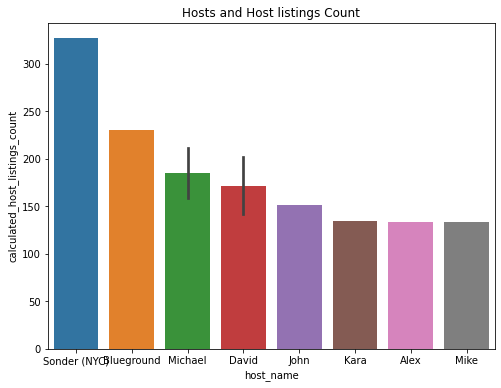

In [ ]:
# representing the above analysis through plotting using seaborn

plt.figure(figsize=(8,6))
sns.barplot(x= host_listing['host_name'],y=host_listing['calculated_host_listings_count'])
plt.title('Hosts and Host listings Count')

2) What can we learn from predictions? (ex: locations, prices, reviews, etc)


In [ ]:
# prices in different localities
price= airbnb_df.groupby(['name','neighbourhood_group','neighbourhood','price','minimum_nights'])['number_of_reviews'].count().reset_index()

max_prices= price.sort_values('price',ascending=False).head(25)
max_prices

,name,neighbourhood_group,neighbourhood,price,minimum_nights,number_of_reviews
20222,Furnished room in Astoria apartment,Queens,Astoria,10000,100,1
1112,1-BR Lincoln Center,Manhattan,Upper West Side,10000,30,1
27228,Luxury 1 bedroom apt. -stunning Manhattan views,Brooklyn,Greenpoint,10000,5,1
36159,"Quiet, Clean, Lit @ LES & Chinatown",Manhattan,Lower East Side,9999,99,1
41053,Spanish Harlem Apt,Manhattan,East Harlem,9999,5,1
2225,2br - The Heart of NYC: Manhattans Lower East ...,Manhattan,Lower East Side,9999,30,1
7092,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,Manhattan,Tribeca,8500,30,1
19735,Film Location,Brooklyn,Clinton Hill,8000,1,1
18366,East 72nd Townhouse by (Hidden by Airbnb),Manhattan,Upper East Side,7703,1,1
2749,70' Luxury MotorYacht on the Hudson,Manhattan,Battery Park City,7500,1,1


The above table shows the analysis between Price and location, the conclusion can be drawn from the above table

a.In the above 25 observation we see that highest priced property found in Queens, Manhattan,Brooklyn with 10,000 USD

b.Furnished room in Astoria apartment at Astoria in queens nieghbourhood group having the highest price as 10, 000 with 100 minimum nights occupied among all listed property.

c.Luxury TriBeCa Apartment in Manhattan at an very good price of 6500 with 180 nights occupied.

it is concluded that guests prefer more at Luxury TriBeCa Apartment as we can see that more number of stays happening.


Text(0.5, 1.0, 'Max Prices in different neighbourhood ')

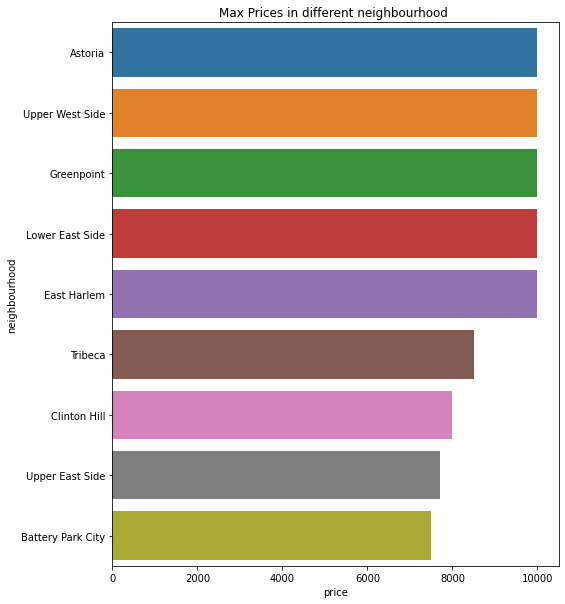

In [ ]:
# Max prices in different neighbourhood
plt.figure(figsize=(8,10))
sns.barplot(x= max_prices['price'],y=max_prices['neighbourhood'])
plt.title('Max Prices in different neighbourhood ')

3) Which hosts are the busiest and why?

In [ ]:
# finding busiest hosts 

busiest= airbnb_df.groupby(['host_name','neighbourhood_group','room_type'])["minimum_nights"].count().reset_index()

busiest_hosts= busiest.sort_values('minimum_nights', ascending=False).head(10)
busiest_hosts


,host_name,neighbourhood_group,room_type,minimum_nights
16549,Sonder (NYC),Manhattan,Entire home/apt,319
2295,Blueground,Manhattan,Entire home/apt,230
12299,Michael,Manhattan,Entire home/apt,143
9190,Kara,Manhattan,Entire home/apt,129
4128,David,Manhattan,Entire home/apt,117
12438,Mike,Manhattan,Entire home/apt,109
545,Alex,Manhattan,Entire home/apt,98
16548,Sonder,Manhattan,Entire home/apt,96
8226,Jeremy & Laura,Manhattan,Entire home/apt,95
9549,Ken,Manhattan,Entire home/apt,95


In the above table we can analyse that top 10 busiest host are in Manhattan, the the guestes are prefering the Entire home/apt in the Manhattan majorly

a. Sonder(NYC) is the top among 10 busiest hosts with 319 nights occupied.

b. Blueground is the second busiest host with 230 nights occupied.

sonder is the busiest host, because the guest prefer more Entire home/apt, and Manhattan is most preferable among the listed neighbhourhod group.


Text(0.5, 1.0, 'Top 10 busiest hosts')

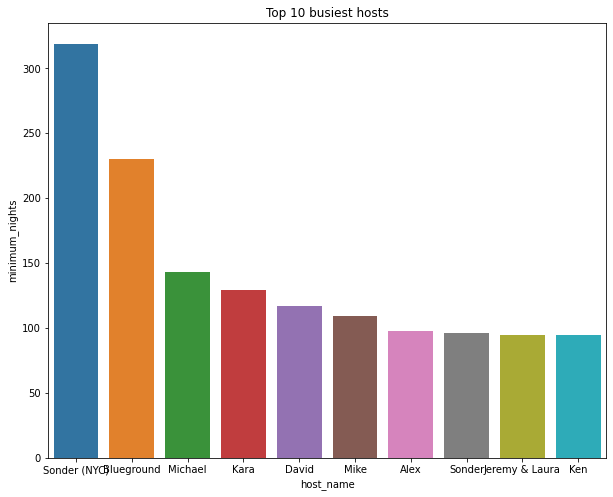

In [ ]:
# plotting top 5 busiest hosts
plt.figure(figsize=(10,8))

sns.barplot(x=busiest_hosts['host_name'],y=busiest_hosts['minimum_nights'] )
plt.title('Top 10 busiest hosts')

4) Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [ ]:
# traffic among different neighborhood and different room types.

traffic = airbnb_df.groupby(['neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
Max_traffic =traffic.sort_values('minimum_nights',ascending=False).head(10)
Max_traffic

,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,13199
4,Brooklyn,Private room,10132
3,Brooklyn,Entire home/apt,9559
7,Manhattan,Private room,7982
10,Queens,Private room,3372
9,Queens,Entire home/apt,2096
1,Bronx,Private room,652
8,Manhattan,Shared room,480
5,Brooklyn,Shared room,413
0,Bronx,Entire home/apt,379


In the above table we can conclude that 

a.The Guests are prefer the more manhattan, this lead to more traffic in manhattan(Entire home/apt) with the max stays of 13199.

b.In Brooklyn the guest are prefer more  of the Private room with 10132 night stays.

c.we can clear see that the guests preference of room type change according to location. 

Text(0.5, 1.0, 'Minimum nights surge vs different room types')

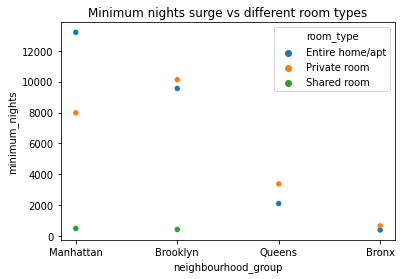

In [ ]:
# plotting people preferences of different types of rooms in different neighbourhood


sns.scatterplot(x=Max_traffic['neighbourhood_group'], y=Max_traffic['minimum_nights'], hue=Max_traffic['room_type'])
plt.title('Minimum nights surge vs different room types')